# Problem statement: 
There are many different factors that can affect the price of a laptop, such as the processor, RAM, storage, display, and brand. It can be difficult for consumers to know how much they should expect to pay for a laptop with a specific set of features.

# Objective:
To develop a laptop price predictor model that can accurately predict the price of a laptop based on its features. The model will be evaluated using a variety of metrics, such as R2 score and  MAE. The model will be deployed as a web application so that consumers can use it to make informed decisions about which laptop to buy.

# Importing data and performing EDA 

In [260]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

In [261]:
# Reading data
df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Laptop_price_predictor\laptop_data.csv")
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [262]:
df.shape

(1303, 12)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# <h4>Check for null values</h4>

In [264]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [265]:
# Removing the unnecessary column: [Unnamed: 0]
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns


Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

* Target variable: [Price]
* Independent variables: ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram','Memory', 'Gpu', 'OpSys', 'Weight', 'Price']

# <h4>Analysing the target variable distribution </h4>

<AxesSubplot:xlabel='Price', ylabel='Density'>

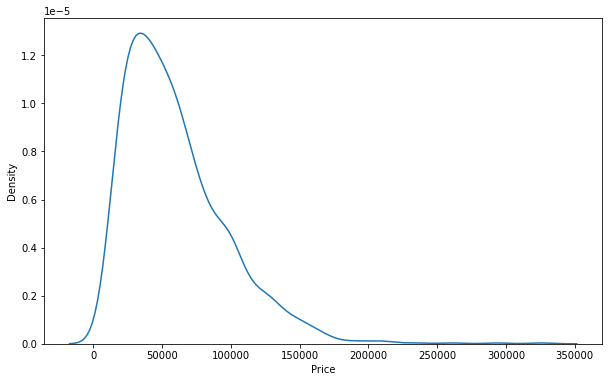

In [266]:
plt.figure(figsize=(10,6))
sb.kdeplot(data=df,x='Price')

`Price` distribution is right skewed. That indicatess that majority of the laptops price is less than 100000 

 <h4> Performing univariate Analysis </h4>

 <h4> 1. Company</h4>

<AxesSubplot:>

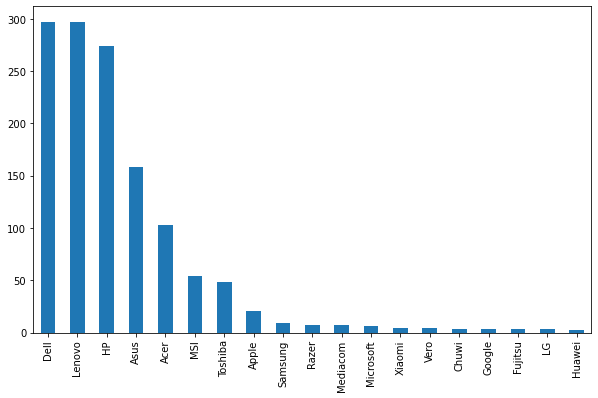

In [267]:
df['Company'].value_counts().plot(kind='bar',figsize=(10,6))

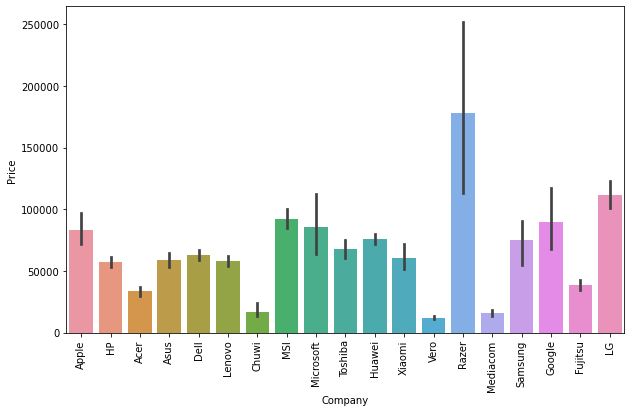

In [268]:
plt.figure(figsize=(10,6))
sb.barplot(data=df,x='Company',y='Price')
plt.xticks(rotation='vertical')
plt.show()

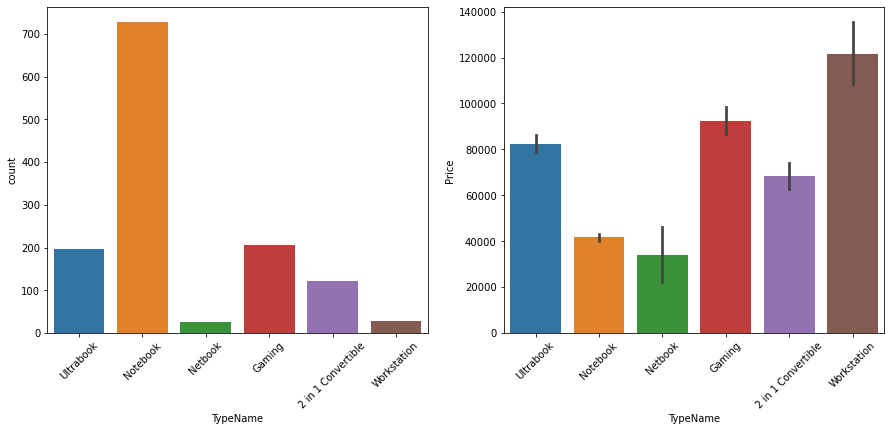

In [269]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='TypeName',ax = axis[0])
sb.barplot(data=df,x='TypeName',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)


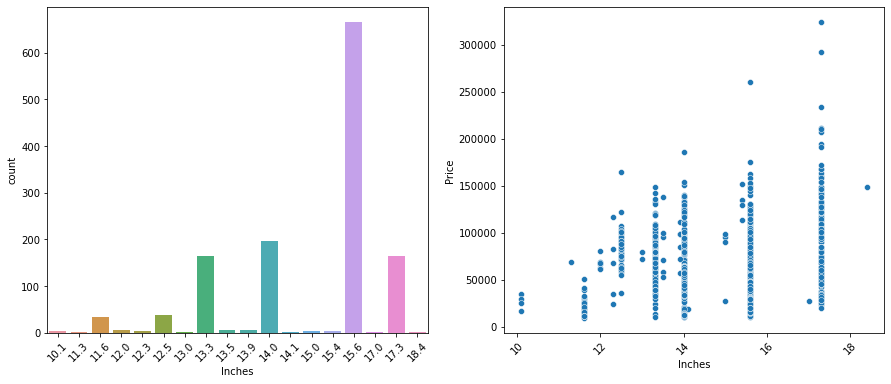

In [270]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='Inches',ax = axis[0])
sb.scatterplot(data=df,x='Inches',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)


In [271]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

`ScreenResolution` feature is having the information about the resolution, Touch screen capability and IPS display. Let's extract all this info for each record.

In [272]:
# Extracting IPS Info
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if "IPS" in x else 0)
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
312,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.8kg,111834.720,1
140,Acer,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 7130U 2.7GHz,4GB,1TB HDD,Nvidia GeForce MX130,Windows 10,3kg,34898.400,1
1111,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,AMD Radeon R5 M315,Windows 7,2.24kg,40980.312,0


In [273]:
# Extracting Touchsreen info
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x: 1 if "Touchscreen" in x else 0)
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen
806,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,2.1kg,41558.40,0,0
412,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon 520,Windows 10,2.1kg,24988.32,0,0
795,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,124142.40,1,1


In [274]:
# Extracting Resolution info
import re
temp_df = df['ScreenResolution'].str.split('x',expand=True)
temp_df[0] =  temp_df[0].apply(lambda x: re.sub('[^0-9]',"",x))
temp_df.head()

,0,1
0,2560,1600
1,1440,900
2,1920,1080
3,2880,1800
4,2560,1600


In [275]:
df['X_resol'] = temp_df[0].astype(int)
df['Y_resol'] = temp_df[1].astype(int)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,X_resol,Y_resol
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080


In [276]:
# Dropping the ScreenResolution column as the most of the information is extracted in to other columns
df.drop('ScreenResolution',axis=1,inplace=True)

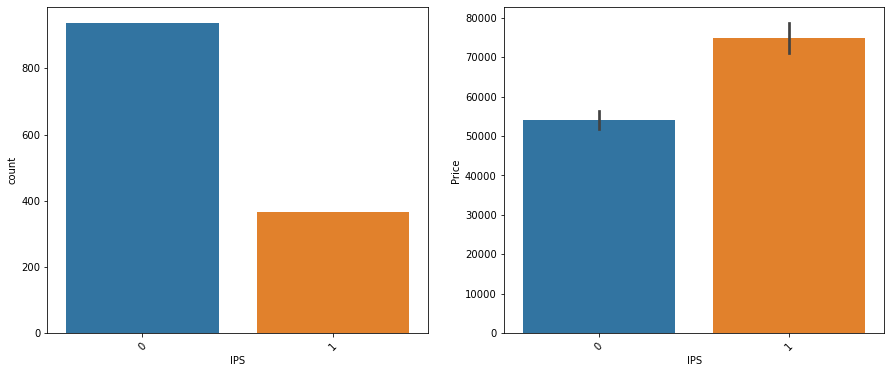

In [277]:
# Analysing with respect to the newly formed columns
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='IPS',ax = axis[0])
sb.barplot(data=df,x='IPS',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)


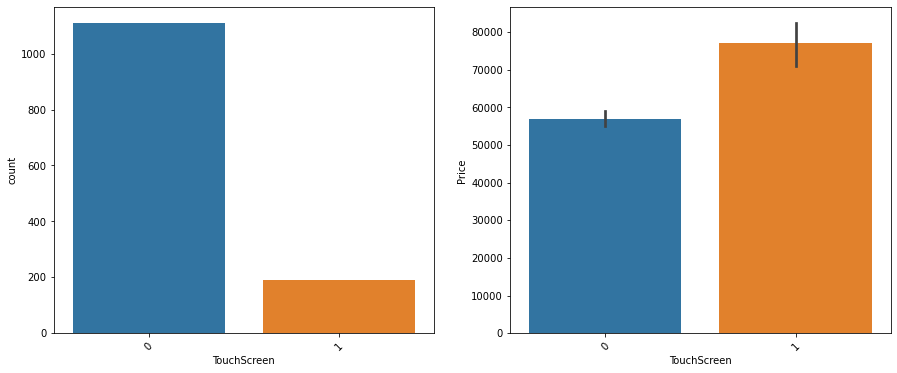

In [278]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='TouchScreen',ax = axis[0])
sb.barplot(data=df,x='TouchScreen',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)


In [279]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
IPS            0.252208
TouchScreen    0.191226
X_resol        0.363806
Y_resol        0.552809
Name: Price, dtype: float64

`X_resol`, `Y_resol`, `IPS`  are having positive correlation with `Price`.
`X_resol`, `Y_resol` and `Inches` can be clubbed together in order to get pixels per Inche parameter, By this way we can reduce the problem of multi dimensionality also.

Formula for `PPI` from googlr: ppi = sqrt((resolution_x^2) + (resolution_y^2))/ Inches

In [280]:
df['PPI'] = round(((df['X_resol']**2 + df['Y_resol']**2)**0.5)/df['Inches'],2)
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,X_resol,Y_resol,PPI
929,HP,Notebook,14.0,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,61218.72,0,0,1366,768,111.94
241,Asus,Notebook,17.3,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 150MX,Windows 10,2.1kg,61005.60,0,0,1920,1080,127.34
842,HP,Notebook,17.3,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63kg,48484.80,0,0,1600,900,106.11


In [281]:
df.drop(['X_resol','Y_resol'],axis=1,inplace=True)

In [282]:
df.corr()['Price']

Inches         0.068197
Price          1.000000
IPS            0.252208
TouchScreen    0.191226
PPI            0.351860
Name: Price, dtype: float64

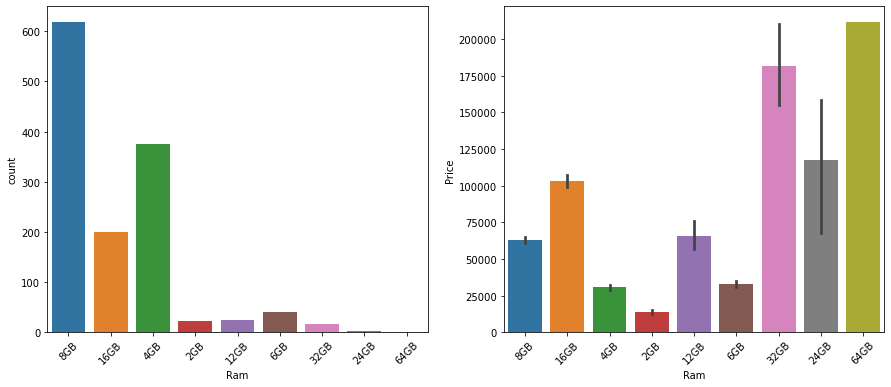

In [283]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='Ram',ax = axis[0])
sb.barplot(data=df,x='Ram',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)

In [284]:
# extracting the Numerical feature 
df['Ram'] = df['Ram'].apply(lambda x: re.sub('[^0-9]',"",x))
df['Ram'] = df['Ram'].astype(int)
df.head(4)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1,0,226.98
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.68
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.21
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1,0,220.53


In [285]:
# CPU
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Let's extract the first 3 important features from the `Cpu` column  

In [286]:
# CPU
df['Cpu'] = df['Cpu'].apply(lambda x:  " ".join( x.split()[:3]))
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI
448,MSI,Gaming,15.6,Intel Core i5,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,54757.9872,0,0,141.21
287,Asus,Ultrabook,15.6,Intel Core i5,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,52054.5600,0,0,141.21
190,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,150462.7200,0,1,209.80


In [287]:
df['Cpu'].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

As the majority of the Cpu brands are from Intel, Let's perform a slight modification in the above naming convention. Let's push the non-Intel branches into other's category 

In [288]:
def cpu_naming(x):
    if x == 'Intel Core i7' or x == 'Intel Core i5' or x == 'Intel Core i3':
        return x
    elif "Intel" in x:
        return "Other Intel brands"
    elif "AMD" in x:
        return "AMD Brands"
    else:
        return "Other Brands"

In [289]:
df['Cpu'] = df['Cpu'].apply(cpu_naming)
df['Cpu'].value_counts()

Intel Core i7         527
Intel Core i5         423
Other Intel brands    154
Intel Core i3         136
AMD Brands             62
Other Brands            1
Name: Cpu, dtype: int64

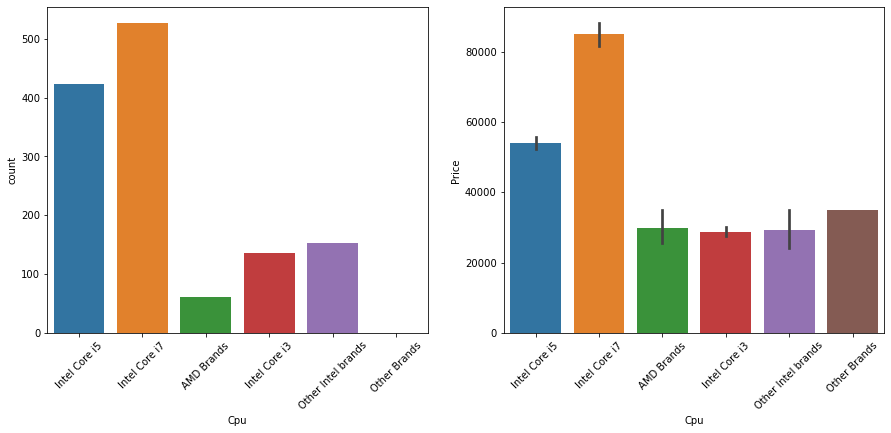

In [290]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='Cpu',ax = axis[0])
sb.barplot(data=df,x='Cpu',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)

In [291]:
# Memory
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

As `Memory` column is having info regarding the driver type and storage capacity. Let's extract the info into individual columns 

In [292]:

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\prasa\AppData\Local\Temp\ipykernel_5992\510734329.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\prasa\AppData\Local\Temp\ipykernel_5992\510734329.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [293]:
df.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,HDD,SSD,Hybrid,Flash_Storage
828,Acer,Netbook,11.6,Other Intel brands,4,32 Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,18914.4000,1,0,135.09,0,0,0,32
177,MSI,Gaming,18.4,Intel Core i7,32,512 SSD + 1000 HDD,Nvidia GTX 980 SLI,Windows 10,4.4kg,149130.7200,0,0,119.72,1000,512,0,0
394,Dell,Notebook,15.6,Intel Core i7,8,256 SSD,AMD Radeon R7 M445,Linux,2.33kg,41498.1936,0,0,141.21,0,256,0,0


In [294]:
# Droping memory column 
df.drop('Memory',axis=1,inplace=True)

In [295]:
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Price            1.000000
IPS              0.252208
TouchScreen      0.191226
PPI              0.351860
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

<AxesSubplot:>

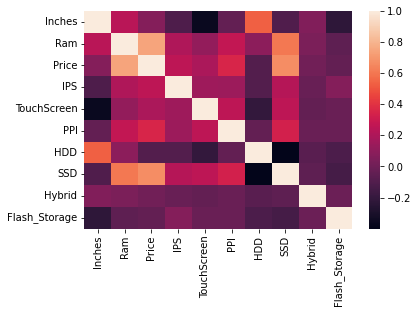

In [296]:
sb.heatmap(df.corr())

In [297]:
# HDD, Hybrid, Flash_Storage and Inches are not having any correlation with the output. So neglecting the Mentioned features
df.drop(columns=['Hybrid','Flash_Storage','Inches'],axis=1,inplace=True)

In [298]:
df.sample(3)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,TouchScreen,PPI,HDD,SSD
857,HP,2 in 1 Convertible,Intel Core i7,8,Intel HD Graphics 620,Windows 10,1.28kg,136343.52,0,1,165.63,0,256
248,HP,Notebook,Intel Core i5,4,Intel UHD Graphics 620,Windows 10,1.49kg,35964.00,1,0,165.63,500,0
1202,Dell,2 in 1 Convertible,Intel Core i7,16,Intel UHD Graphics 620,Windows 10,2kg,68464.80,0,1,141.21,0,512


In [299]:
# Gpu
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Replace the Graphic card names with their corresponding company name.

In [300]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df.drop('Gpu',axis=1,inplace=True)

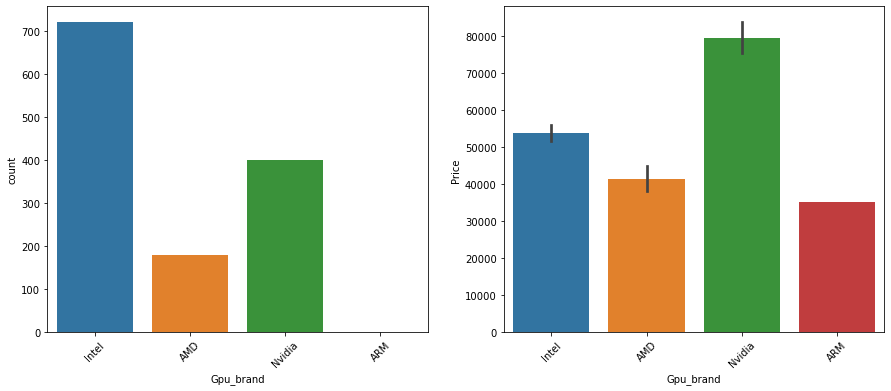

In [301]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='Gpu_brand',ax = axis[0])
sb.barplot(data=df,x='Gpu_brand',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)

In [302]:
# OpSys
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [303]:
# Replacing the OS names with their parent software names instead of version names
def os_name_change(x):
    if "Windows" in x:
        return "Windows"
    elif "Mac" in x or "mac" in x:
        return "Mac"
    elif "Android" in x:
        return "Android"
    elif "Linux" in x:
        return "Linux"
    elif "Chrome" in x:
        return "Chrome"
    elif "No" in x:
        return "No OS"
    else:
        return "Others"
        

In [304]:
df['OpSys'] = df['OpSys'].apply(os_name_change)

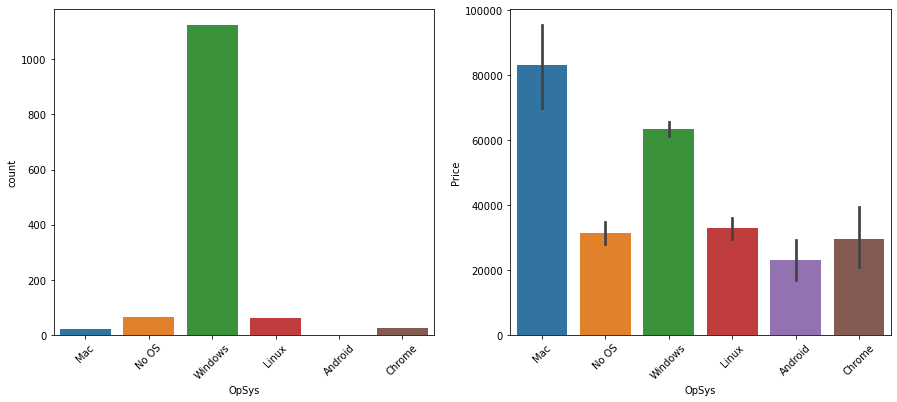

In [305]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.countplot(data=df,x='OpSys',ax = axis[0])
sb.barplot(data=df,x='OpSys',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)

In [306]:
df.sample(3)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,IPS,TouchScreen,PPI,HDD,SSD,Gpu_brand
848,HP,2 in 1 Convertible,Intel Core i5,8,Windows,1.28kg,121318.56,0,1,165.63,0,256,Intel
28,Dell,Ultrabook,Intel Core i7,8,Windows,1.88kg,69157.44,0,0,141.21,0,512,Intel
369,HP,Ultrabook,Intel Core i7,8,Windows,1.36kg,93240.00,1,0,157.35,0,256,Intel


In [307]:
# Weight
df['Weight'] = df['Weight'].apply(lambda x:x.replace("kg",''))
df['Weight'] =df['Weight'].astype(float)

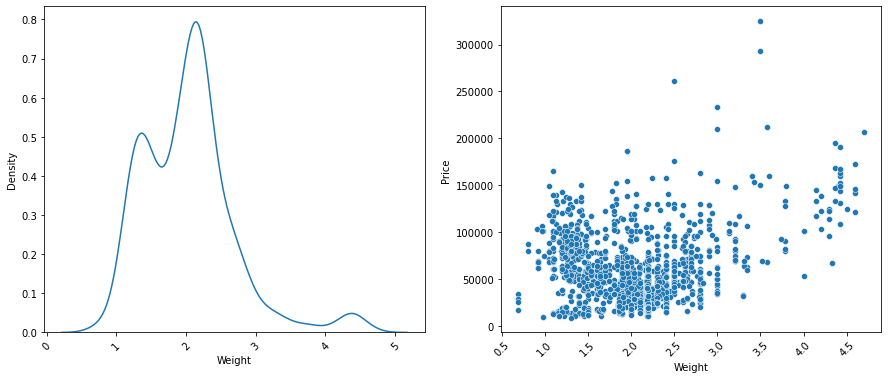

In [308]:
fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
sb.kdeplot(data=df,x='Weight',ax = axis[0])
sb.scatterplot(data=df,x='Weight',y='Price',ax = axis[1])
axis[0].tick_params(axis='x', labelrotation=45)
axis[1].tick_params(axis='x', labelrotation=45)

In [309]:
df.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
IPS            0.252208
TouchScreen    0.191226
PPI            0.351860
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

Weight is having little positive correlation with the Price of the laptop. Most of the laptop weights are less than 2.5Kg

# Observations from EDA
1. Laptops with IPS display are a bit costlier than normal display laptops
2. It is obivious that laptop price increases with the RAM. Laptops with RAM size 8GB and 4GB are more in number. 
3. Laptops with Intel core i7 processor are bit costlier than other processors.
4. Laptops with NVIDIA graphics card are expensive than others. Majority of th elaptops are using Intel graphics cards.
5. Windows OS is widely used. Mac OS is the expensive OS
6. PPI and SSD are having strong +ve correlation with the Price of the laptop

# Training our model

As the data is right skewed, Perform some transformation techniques in order to convert the data into normal form

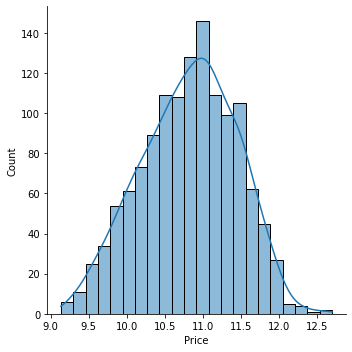

In [310]:
# Performing Log transformation
sb.displot(np.log(df['Price']),kde=True)

In [311]:
# Dividing the data into train test splits
from sklearn.model_selection import train_test_split


In [312]:
X = df.drop('Price',axis=1)
y = np.log(df['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=2)

## Importing the necessary libraries

In [313]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


In [324]:
# Importing the models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.svm import SVR

## Linear regression implementation

In [315]:
step1 = ColumnTransformer(transformers=
                      [('encoding', OneHotEncoder(drop='first'),[0,1,2,4,11])]
                     )
step2 = LinearRegression()
pipe = Pipeline([("step1",step1),
                ("step2",step2)])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))



The R2 Score is:  0.6404853013400102
Mean Absolute error of the model is:  0.24338076785901047


## Ridge Regression 

In [316]:
step1 = ColumnTransformer([
    ('encoding',OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = Ridge(alpha=0.2)
pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train) 
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.6376973536908762
Mean Absolute error of the model is:  0.24401187368431296


## Random Forest Regressor

In [317]:
step1 = ColumnTransformer([
    ("encode",OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = RandomForestRegressor(n_estimators=120,
                              random_state=4,
                              max_samples=0.6,
                              max_features=0.7,
                              max_depth=20)

pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.7291969714378719
Mean Absolute error of the model is:  0.2203720071908298


## XGB Regressor

In [318]:
step1 = ColumnTransformer([
    ("encode",OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = XGBRegressor(n_estimators=60,max_depth=10,learning_rate=0.2)

pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.7702455183958982
Mean Absolute error of the model is:  0.21093257757695894


## Support Vector Regressor

In [325]:
step1 = ColumnTransformer([
    ("encode",OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = SVR()

pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.7323726742805932
Mean Absolute error of the model is:  0.21899222709691885


## KNN Regressor

In [329]:
step1 = ColumnTransformer([
    ("encode",OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.6597927837070892
Mean Absolute error of the model is:  0.23940470151019475


XGB model is performing better with a R2 value of 0.77 and MAE of 0.21. Let's proceed with the deployment part

In [353]:
XGB = XGBRegressor(n_estimators=60,max_depth=10,learning_rate=0.2)

step1 = ColumnTransformer([
    ("encode",OneHotEncoder(drop='first'),[0,1,2,4,11])
])
step2 = XGB

pipe = Pipeline([("Step1",step1),
                ("Step2",step2)])
pipe.fit(X_train,y_train)
y_predict = pipe.predict(X_test)
print("The R2 Score is: ", r2_score(y_predict,y_test))
print("Mean Absolute error of the model is: ", mean_absolute_error(y_predict,y_test))

The R2 Score is:  0.7702455183958982
Mean Absolute error of the model is:  0.21093257757695894


## Model deployment

In [333]:
import pickle

In [337]:
pickle.dump(XGB,open("XGB.pkl",'wb'))
pickle.dump(pipe,open("pipe.pkl","wb"))